# Plots

In [1]:

import sys
sys.path.append('/home/hamid/ensemble_tool/EnsembleTools/')

## Download from Atlas and Load

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis

ens_codes = [
    '3a1g_B'
]
data_dir = '/home/hamid/PED_Data_analysis/nikola'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='atlas')
analysis.generate_trajectories()

/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/neo_force_scheme/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


Download complete. Saved to: /home/hamid/PED_Data_analysis/nikola/3a1g_B.zip
Downloaded file 3a1g_B.zip from Atlas.
Extracted directory /home/hamid/PED_Data_analysis/nikola.
Copied and renamed /home/hamid/PED_Data_analysis/nikola/3a1g_B.pdb to /home/hamid/PED_Data_analysis/nikola/3a1g_B_prod_R2_fit.top.pdb.
Copied and renamed /home/hamid/PED_Data_analysis/nikola/3a1g_B.pdb to /home/hamid/PED_Data_analysis/nikola/3a1g_B_prod_R1_fit.top.pdb.
Copied and renamed /home/hamid/PED_Data_analysis/nikola/3a1g_B.pdb to /home/hamid/PED_Data_analysis/nikola/3a1g_B_prod_R3_fit.top.pdb.
Analysing ensembles: ['3a1g_B_prod_R2_fit', '3a1g_B_prod_R1_fit', '3a1g_B_prod_R3_fit']
Trajectory already exists for ensemble 3a1g_B_prod_R2_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_B_prod_R1_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_B_prod_R3_fit. Loading trajectory.


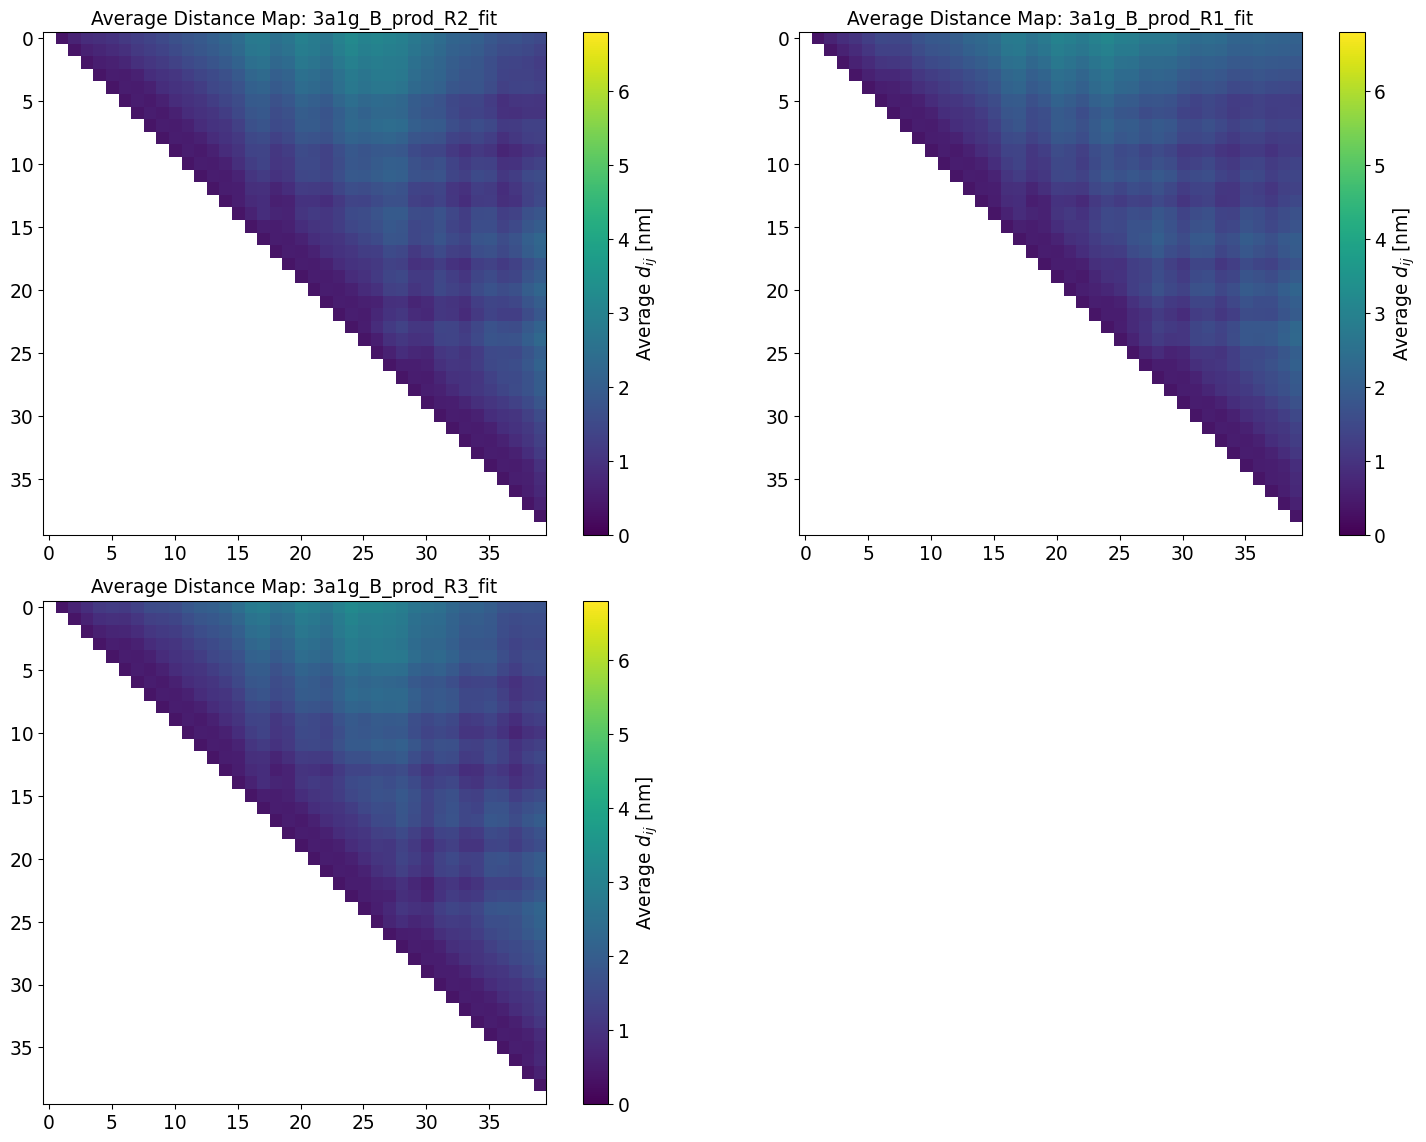

In [3]:
analysis.plot_average_dmap_comparison()

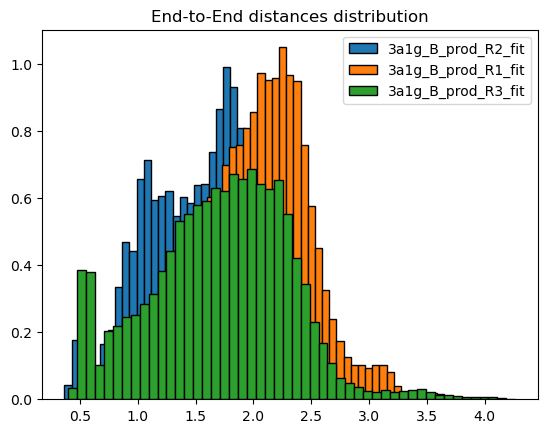

In [4]:
analysis.end_to_end_distances_plot(bins=50, violin_plot=False, median=False, means=True)

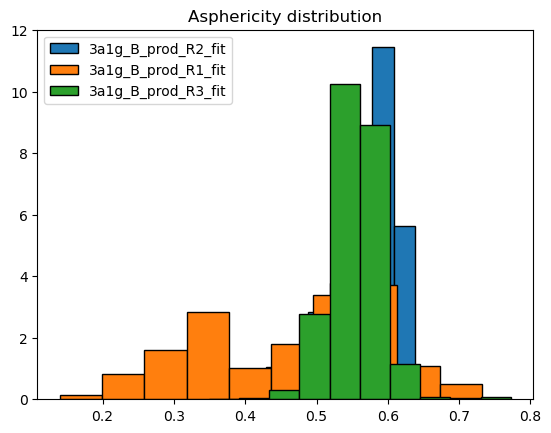

In [5]:
analysis.plot_asphericity_dist(bins=10, violin_plot=False)

Pearson coeff for 3a1g_B_prod_R2_fit = 0.583
Pearson coeff for 3a1g_B_prod_R1_fit = 0.884
Pearson coeff for 3a1g_B_prod_R3_fit = 0.475


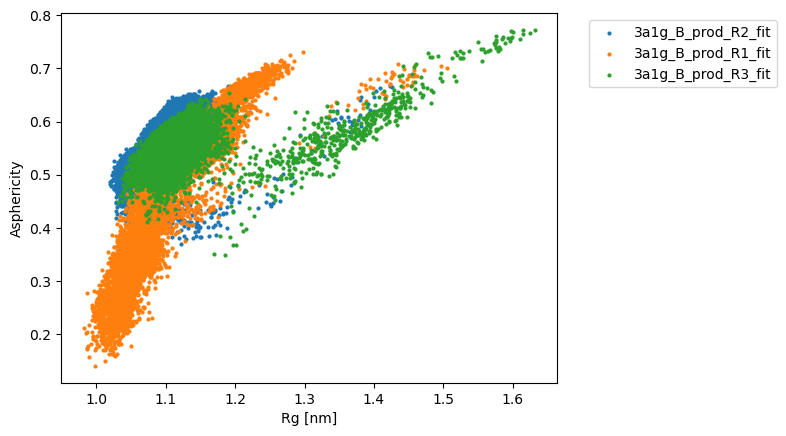

In [6]:
analysis.plot_rg_vs_asphericity()

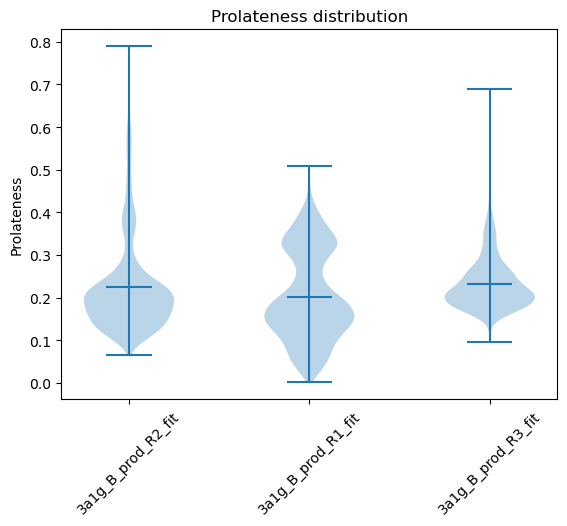

In [7]:
analysis.plot_prolateness_dist(bins=10, violin_plot=True)

Pearson coeff for 3a1g_B_prod_R2_fit = -0.315
Pearson coeff for 3a1g_B_prod_R1_fit = 0.444
Pearson coeff for 3a1g_B_prod_R3_fit = 0.203


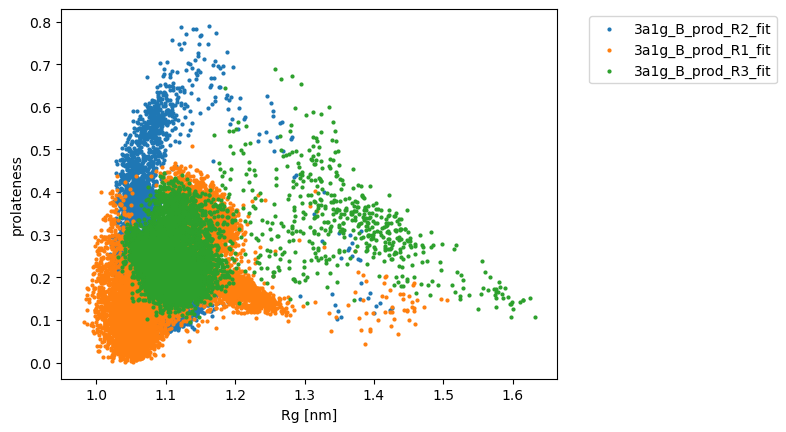

In [8]:
analysis.plot_rg_vs_prolateness()

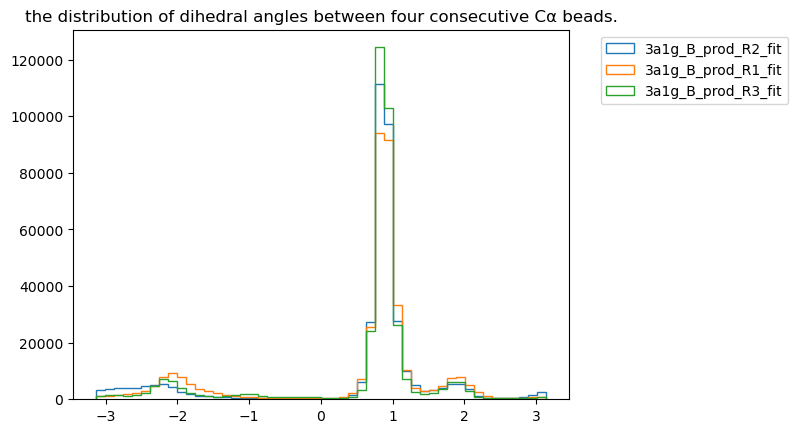

In [9]:
analysis.plot_alpha_angles_dist()

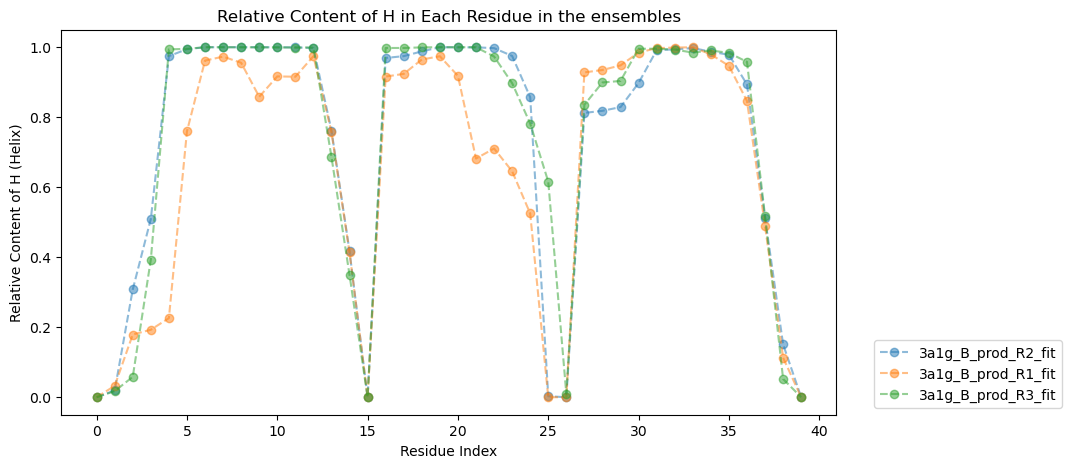

In [10]:
analysis.plot_relative_helix_content()

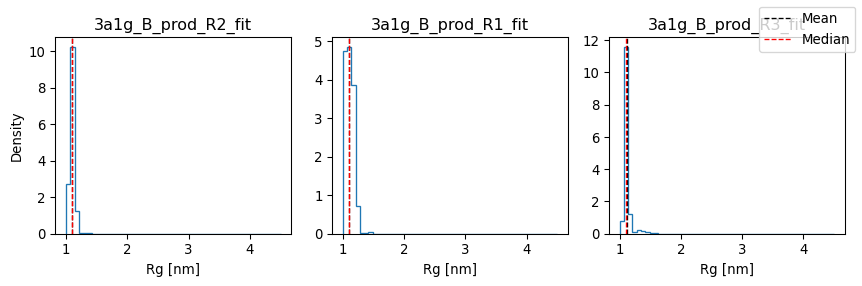

In [11]:
analysis.trajectories_plot_rg_comparison()

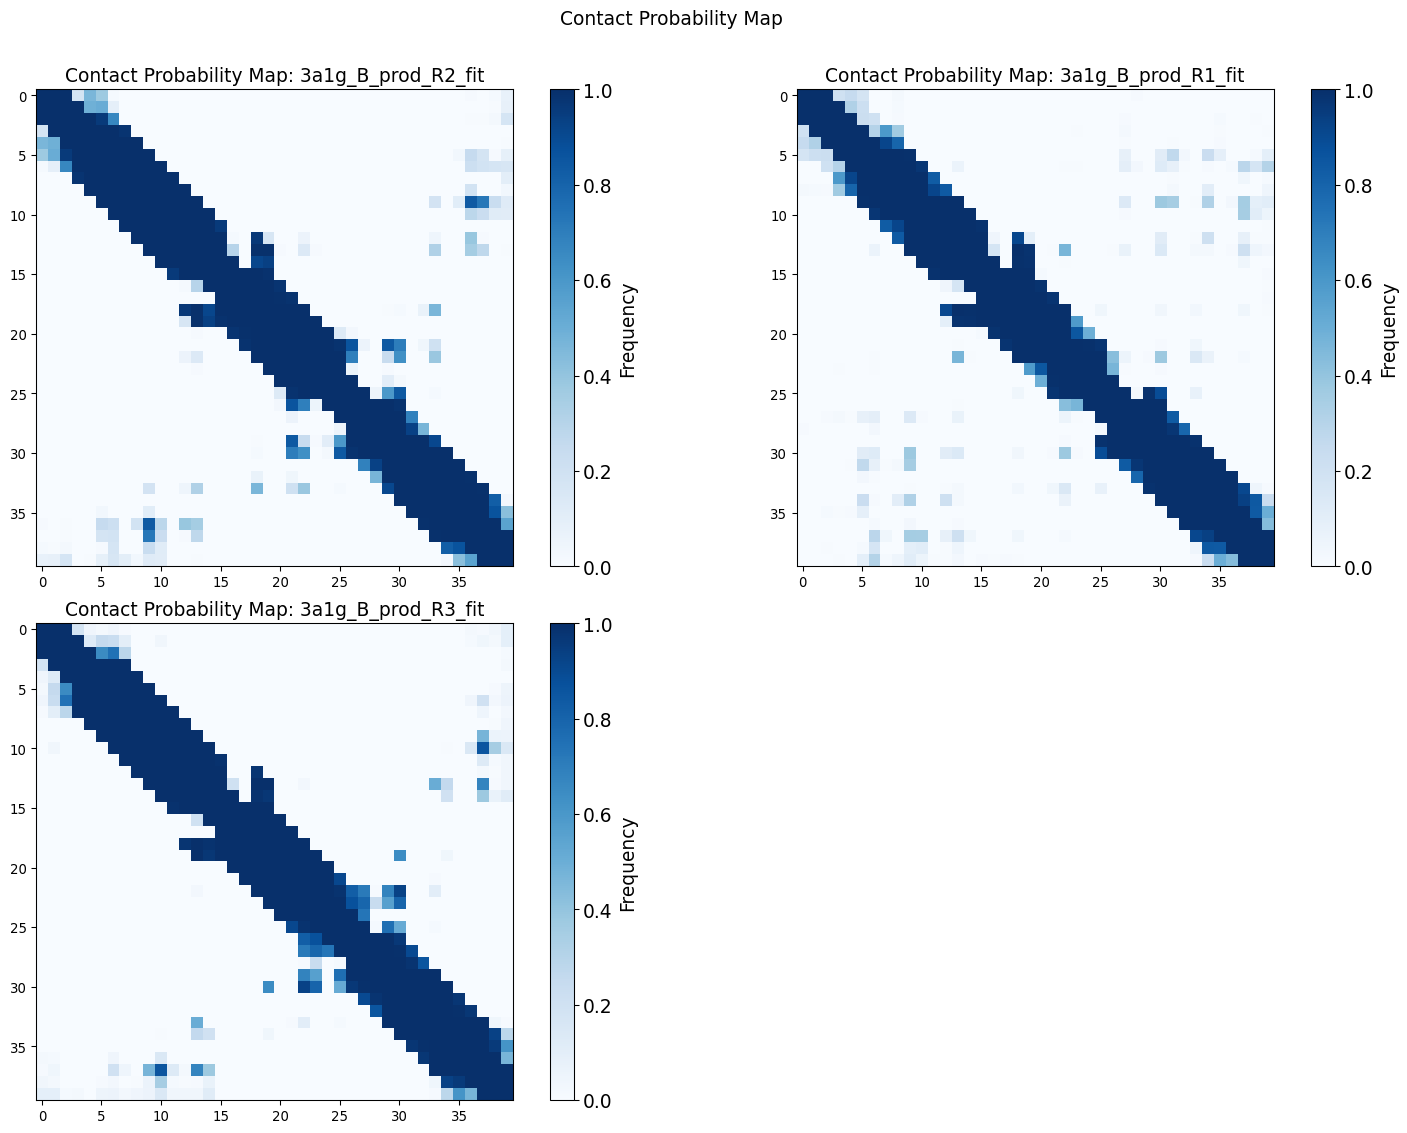

In [12]:
analysis.plot_contact_prob(title="Contact Probability Map", threshold=0.8)

Performing feature extraction for Ensemble: 3a1g_B_prod_R1_fit.
Transformed ensemble shape: (10001, 78)
Performing feature extraction for Ensemble: 3a1g_B_prod_R2_fit.
Transformed ensemble shape: (10001, 78)
Performing feature extraction for Ensemble: 3a1g_B_prod_R3_fit.
Transformed ensemble shape: (10001, 78)
Feature names: ['GLY2-PHI', 'SER3-PHI', 'MET4-PHI', 'GLU5-PHI', 'ARG6-PHI', 'ILE7-PHI', 'LYS8-PHI', 'GLU9-PHI', 'LEU10-PHI', 'ARG11-PHI', 'ASN12-PHI', 'LEU13-PHI', 'MET14-PHI', 'SER15-PHI', 'GLN16-PHI', 'SER17-PHI', 'ARG18-PHI', 'THR19-PHI', 'ARG20-PHI', 'GLU21-PHI', 'ILE22-PHI', 'LEU23-PHI', 'THR24-PHI', 'LYS25-PHI', 'THR26-PHI', 'THR27-PHI', 'VAL28-PHI', 'ASP29-PHI', 'HIS30-PHI', 'MET31-PHI', 'ALA32-PHI', 'ILE33-PHI', 'ILE34-PHI', 'LYS35-PHI', 'LYS36-PHI', 'TYR37-PHI', 'THR38-PHI', 'SER39-PHI', 'GLY40-PHI', 'GLY1-PSI', 'GLY2-PSI', 'SER3-PSI', 'MET4-PSI', 'GLU5-PSI', 'ARG6-PSI', 'ILE7-PSI', 'LYS8-PSI', 'GLU9-PSI', 'LEU10-PSI', 'ARG11-PSI', 'ASN12-PSI', 'LEU13-PSI', 'MET14-PSI', 

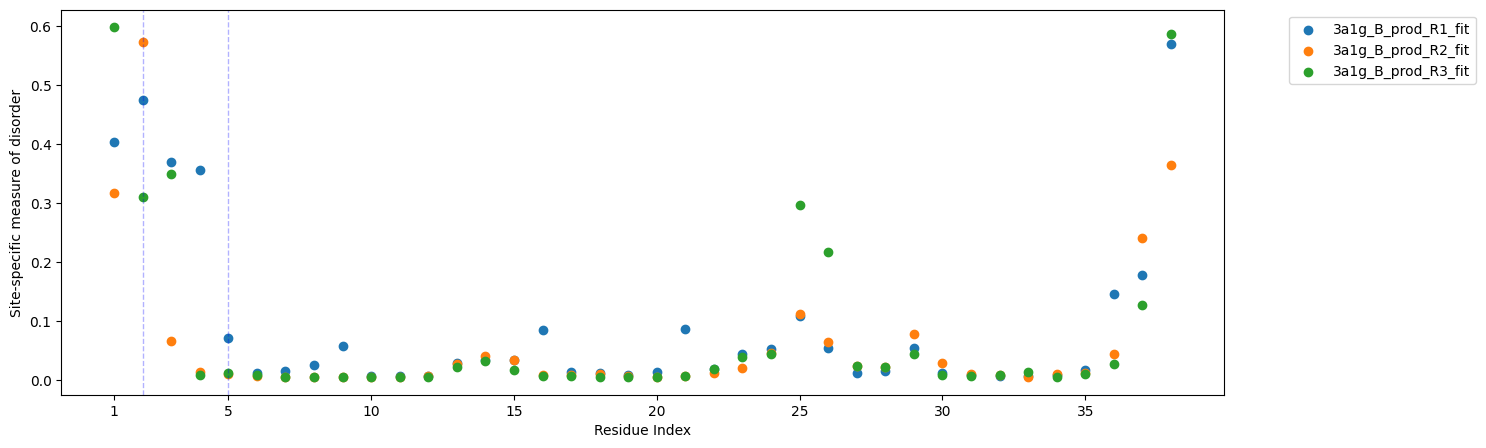

In [13]:
analysis.plot_ss_measure_disorder(pointer=[2,5])

In [16]:
analysis.random_sample_trajectories(sample_size=200)

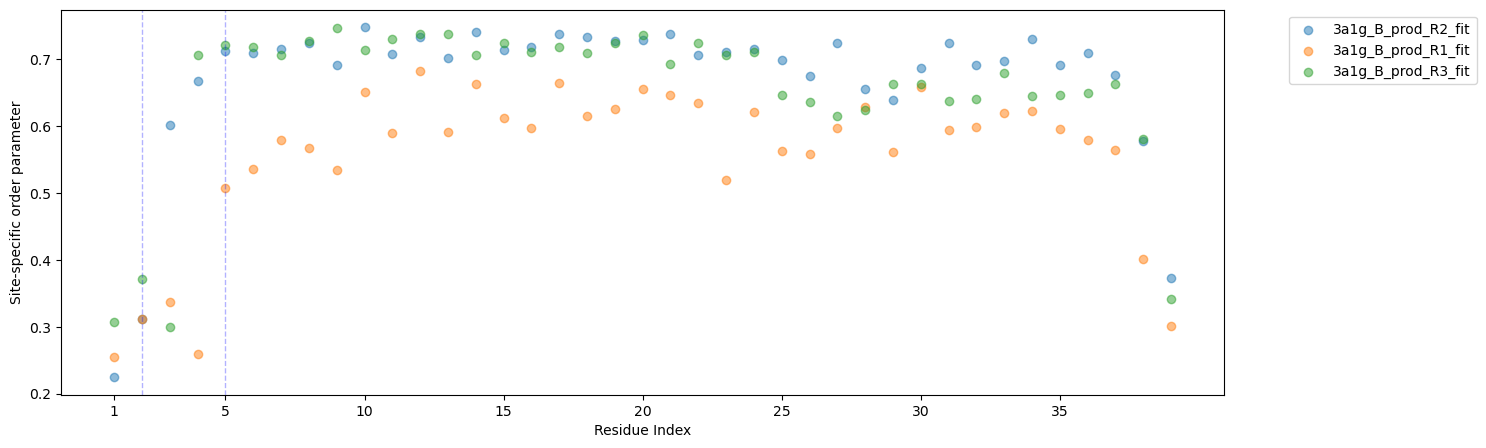

In [17]:
analysis.plot_ss_order_parameter(pointer=[5,2])